# <div style="text-align:center">Heart Attack Risk</div>

## Intengrantes: 
<ul>
    <li>Paulina Orozco Torres</li>
    <li>Cristian Diaz</li>
    <li>Juan Pablo Garcia Rosales</li>
</ul> 

## Import libraries

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Leer el dataset: Heart Attack Risk

El dataset utilizado puede ser descargado en: 
https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/data

Leer el dataset para obtener las matices X y Y. 

In [2]:
#1. Leer el dataset
data = pd.read_csv('heart_attack_prediction_dataset.csv')
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
#1.1 Saber si el dataset tiene datos nulos 

print("\nDatos nulos:")
print(data.isnull().sum())


Datos nulos:
Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [4]:
#1.2 Eliminar columnas que no son necesarias para el modelo (Patient ID, Country, Continent, Hemisphere)

data.drop(columns=['Patient ID','Country','Continent', 'Hemisphere'], inplace=True)
data

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,1,1,8,10.806373,235420,19.655895,67,7,7,0
8759,28,Female,120,157/102,73,1,0,0,1,0,...,0,0,8,3.833038,217881,23.993866,617,4,9,0
8760,47,Male,250,161/75,105,0,1,1,1,1,...,1,0,5,2.375214,36998,35.406146,527,4,4,1
8761,36,Male,178,119/67,60,1,0,1,0,0,...,1,1,5,0.029104,209943,27.294020,114,2,8,0


In [5]:
#1.3 Cambiar Datos categóricos

# Columna - Sex (Male = 1, Female = 0)

data['Sex'] = data['Sex'].replace({'Male': 1, 'Female': 0})

# Columna - Diet (Unhealthy = 2, Average = 1, Healthy = 0)

data['Diet'] = data['Diet'].replace({'Unhealthy': 2, 'Average': 1, 'Healthy': 0})

# Columna - Blood Pressure, separarla en dos columnas (Systolic y Diastolic)
# y convertilas a columnas de tipo entero, y eliminar la columna Blood Pressure.

data.insert(4, 'BP_Systolic', data['Blood Pressure'].apply(lambda x: x.split('/')[0]))
data.insert(5, 'BP_Diastolic', data['Blood Pressure'].apply(lambda x: x.split('/')[1]))

cat_columns = ['BP_Systolic','BP_Diastolic']
data[cat_columns] = data[cat_columns].astype(int)

data.drop(columns=['Blood Pressure'], inplace=True)


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   BP_Systolic                      8763 non-null   int64  
 4   BP_Diastolic                     8763 non-null   int64  
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
#1.4 Obtener las matrices: x, y

dataset = np.array(data)
m, n = np.shape(dataset)
print('Rows:', m, 'Columns:', n)

# la columna (Heart Attack Risk) que contiene los resultados, es la última columna del dataset

x = dataset[:, 0:-1]
y = dataset[:, -1]
y = y.reshape(-1, 1)

print('x:', np.shape(x))
print('y:', np.shape(y))

Rows: 8763 Columns: 23
x: (8763, 22)
y: (8763, 1)


<Axes: >

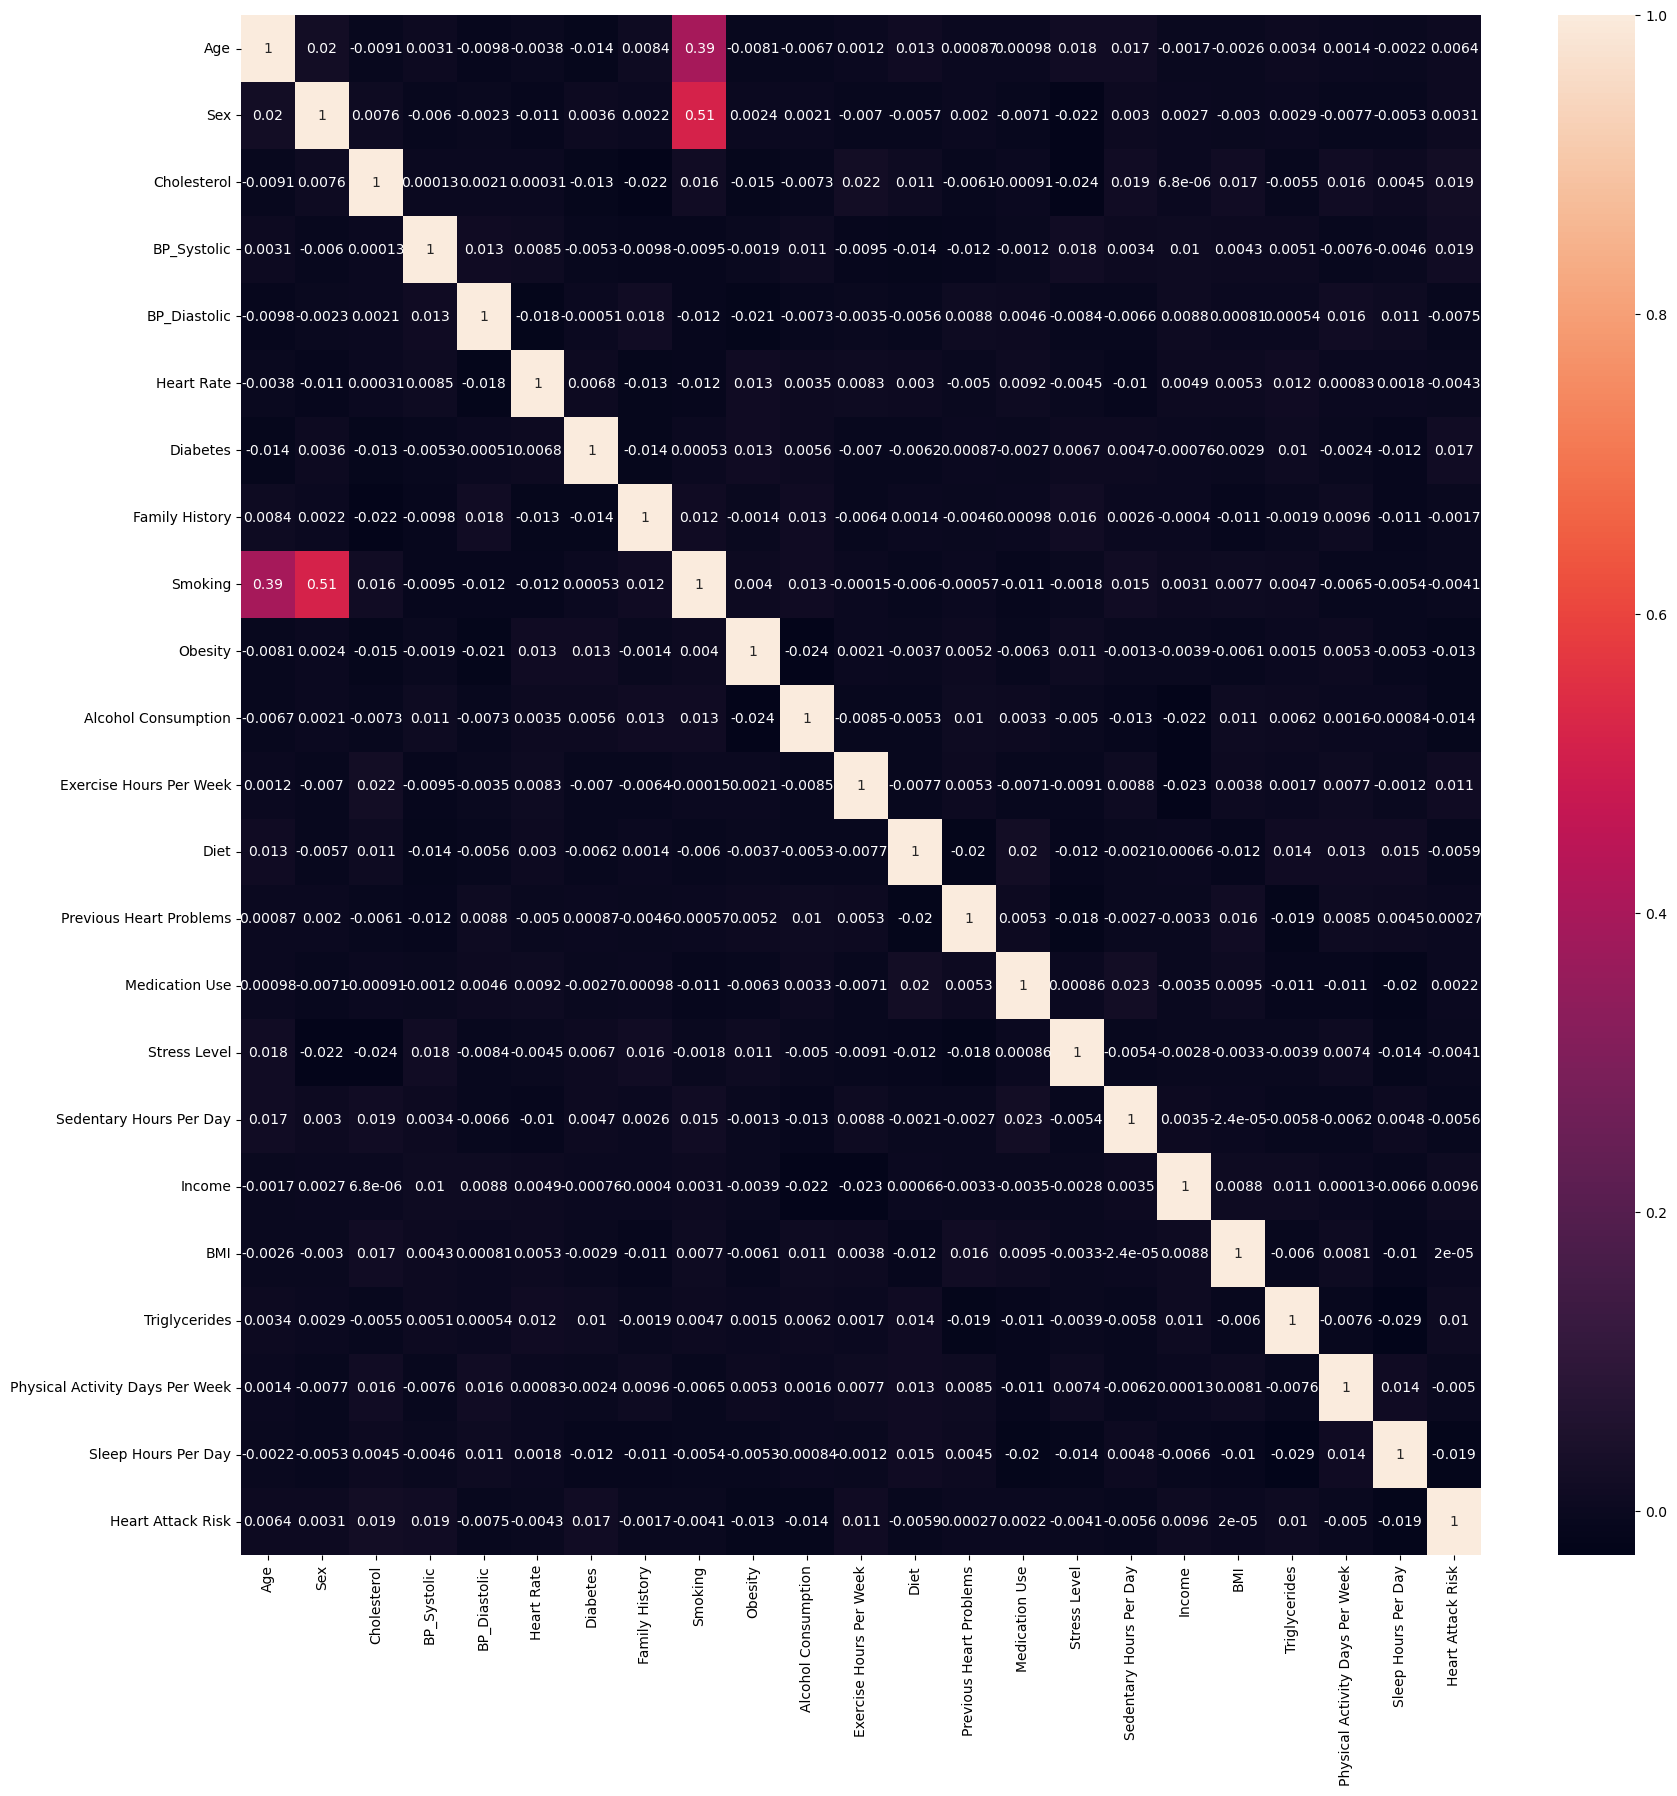

In [7]:
#1.5 Obtener la matriz de correlaciones

numerico = data.select_dtypes(include = ['int64', 'float64'])

correlations = numerico.corr()

# Graficamos, usando sns para observar la matriz de correlaciones

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [8]:
#1.6 Normalizar la matriz X
def normalize(x):
    x_norm = (x - np.mean(x, axis=0)) / np.std(x,axis=0)
    return x_norm

X_norm = normalize(x)

# Conclusiones

En esta entrega se realizo una matriz de correlacion, la matriz de X y Y, asi como normalizar la base de datos.

Lo mas interesante de esta entrega fue poder categorizar los datos de las columnas, para evitar errores futuros y poder obtener los datos más relevantes.